In [38]:
#Task 2, Data Clustering
# 2.1 K-mean clustering with Iris and 3 clusters

# --> 2.1 with synthetic data is further down past the iris section

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline

In [39]:
iris = datasets.load_iris() #Loading the dataset

In [40]:
X = iris.data[:, :2] # Only using the sepal length and sepal width
y = iris.target
xIr = X
yIr = y
#print(X)
#print(y)

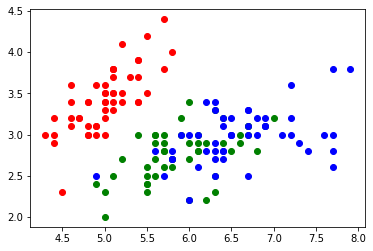

In [41]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], c="red", label=iris.target_names[0]) #Plotting the values
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="green", label=iris.target_names[1])
plt.scatter(X[y==2][:,0], X[y==2][:,1], c="blue", label=iris.target_names[2])

In [42]:
# As we know from the dataset there is supposed to be 3 clusters, but here I will first assign an arbitrary number, as the task says

km = KMeans(n_clusters=3) #Using 4 clusters instead of 3... Just going to trust the standard assigned values here also
km

KMeans(n_clusters=3)

In [53]:
y_predicted = km.fit_predict(X)
#print(y_predicted)

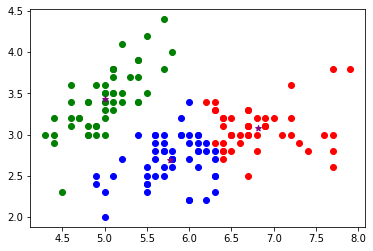

In [44]:
plt.scatter(X[y_predicted==0][:,0], X[y_predicted==0][:,1], c="red", label=iris.target_names[0]) #Plotting the values
plt.scatter(X[y_predicted==1][:,0], X[y_predicted==1][:,1], c="green", label=iris.target_names[1])
plt.scatter(X[y_predicted==2][:,0], X[y_predicted==2][:,1], c="blue", label=iris.target_names[2])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

In [45]:
# As we see here, the purple stars in the plot represents the centroids. Visually, the distances here look correct from the centroids to the data points

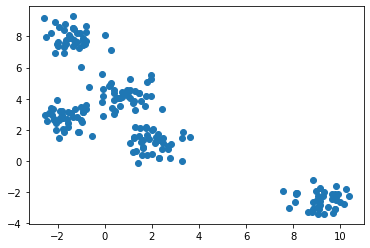

In [46]:
# Synthetic data. Random cluster
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=5, cluster_std=0.65, random_state=0)

plt.scatter(X[:,0], X[:,1])

In [47]:
km = KMeans(n_clusters=4) # Again, just using the automatic default parameters
y_predicted = km.fit_predict(X)

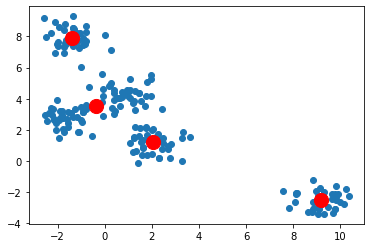

In [48]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red')
plt.show()

In [49]:
# I intentionally selected 4 clusters, even though I created the data with 5 centers. This was just to test the algorithm. It seems to hold up nice for what we are doing.

# Task 2.2. If we didn't know anything about the dataset, and wanted to find the optimal number of clusters we could use the elbow method. This I will demonstarte in the preceding segment

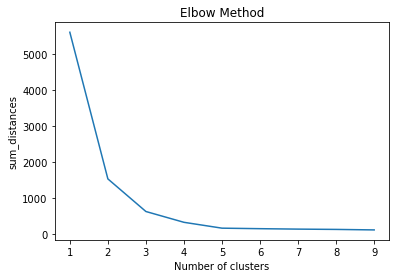

In [50]:
sum_distances = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sum_distances.append(km.inertia_)
plt.plot(range(1, 10), sum_distances)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sum_distances')
plt.show()

In [37]:
# By looking at this graph, although it is kind of hard to see, we see the elbow occurs at the 5 mark, which means 5 should be the optimal number of clusters for this dataset, which is correct in relation to the way I generated this data

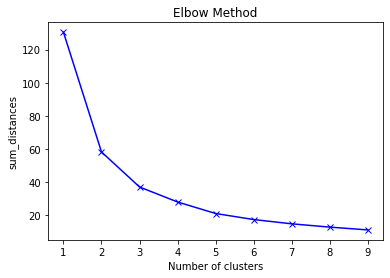

In [52]:
# Using the elbow method on the Iris dataset
sum_distances = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(xIr)
    sum_distances.append(km.inertia_)
plt.plot(range(1, 10), sum_distances, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sum_distances')
plt.show()

In [ ]:
# Here we see that the "elbow point" seems to occur at three clusters